In [1]:
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_VISIBLE_DEVICES=2


In [2]:
from medvqa.train_vqa import debug_main
import shlex

In [3]:
output = debug_main(args=shlex.split(
    ' '.join([        
        '--epochs 1',
        '--batches-per-epoch 20',
        '--batch-size 80',
        '--iters-to-accumulate 1',
        '--num-workers 3',
        '--optimizer-name "adamw"',
        '--scheduler "warmup+decay"',
        '--lr 1e-6',
        '--warmup-and-decay-args "1e-6,4,4e-4,76,5e-6"',
        '--use-padchest',
        '--padchest-use-validation',
        '--padchest-weight 1',
        '--padchest-train-study-ids-path "/mnt/data/pamessina/workspaces/medvqa-workspace/cache/padchest/train_study_ids_20221226_161248.txt"',
        '--padchest-val-study-ids-path "/mnt/data/pamessina/workspaces/medvqa-workspace/cache/padchest/val_study_ids_20221226_161248.txt"',
        '--padchest-test-study-ids-path "/mnt/data/pamessina/workspaces/medvqa-workspace/cache/padchest/test_study_ids_20221226_161248.txt"',
        '--classify-orientation',
        '--raw-image-encoding "densenet-121"',
        '--question-encoding "one-hot"',
        '--answer-decoding "transformer"',
        '--binary-loss-name "wbce-c"',
        '--use-amp',
        '--no-save',
    ])
))

script's arguments:
   epochs: 1
   batches_per_epoch: 20
   checkpoint_folder: None
   iuxray_qa_adapted_reports_filename: None
   mimiccxr_qa_adapted_reports_filename: None
   vocab_min_freq: 10
   embed_size: 256
   question_encoding: one-hot
   answer_decoding: transformer
   question_hidden_size: 128
   answer_hidden_size: 256
   visual_input_mode: raw-image
   raw_image_encoding: densenet-121
   image_local_feat_size: 1024
   image_encoder_pretrained_weights_path: None
   freeze_image_encoder: False
   imagenet_pretrained: False
   visual_features_mlp_in_dim: None
   visual_features_mlp_out_dim: None
   visual_features_mlp_hidden_dims: None
   iuxray_precomputed_visual_features_path: None
   mimiccxr_precomputed_visual_features_path: None
   chexpert_precomputed_visual_features_path: None
   vinbig_precomputed_visual_features_path: None
   clip_version: None
   n_lstm_layers: 1
   transf_dec_nhead: 2
   transf_dec_dim_forward: 256
   transf_dec_num_layers: 2
   question_vec_size:

/home/pamessina/medvqa/medvqa/train_vqa.py:1490: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  debug=debug)


Number of rows before filtering: 160861
Number of rows after filtering: 160754 (dropped nan rows)
Number of rows after filtering: 160741 (dropped study ids not in all_study_ids_set)
Number of rows after filtering: 160723 (dropped rows with unexpected PatientSex_DICOM)
Number of rows after filtering: 160704 (dropped rows with unexpected Projection)
Number of rows after filtering: 160692 (dropped rows with broken images)
Number of rows after filtering: 109821 (dropped rows with duplicate StudyID)
Number of labels: 193
Number of localizations: 104


 10%|█         | 11462/109821 [00:00<00:00, 114617.38it/s]

Generating answers based on labels...


 11%|█▏        | 12521/109821 [00:00<00:00, 125196.09it/s]

Done. Example answer: <s> normal </s>
Generating answers based on localizations...


  4%|▎         | 3921/109821 [00:00<00:04, 23775.36it/s]

Done. Example answer: <s> </s>
Number of non-empty answers: 63528
Generating answers based on labels localizations by sentence...


100%|██████████| 109821/109821 [00:01<00:00, 64202.60it/s]
1it [00:00,  7.30it/s]

Done. Example answer: <s> normal </s>
Creating dataset and dataloader...
Example of positive localization answer: <s> loc costophrenic angle , loc cardiophrenic angle , loc cardiac , loc right </s>
Example of negative localization answer: <s> </s>


193it [00:26,  7.16it/s]
23it [00:00, 224.26it/s]

Done!
len(self.train_dataset) = 1000000000000000000
Creating dataset and dataloader...
Example of positive localization answer: <s> loc axilar , loc right </s>
Example of negative localization answer: <s> </s>


193it [00:00, 224.74it/s]

Done!
len(self.val_dataset) = 4398


Idx: 51693
Image path: /mnt/workspace/padchest/images-small/216840111366964013076187734852011193141938362_00-142-143.png


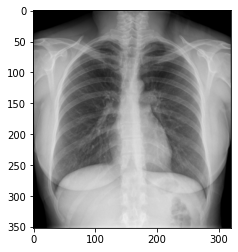

Projection: PA
Gender: F
Question: **(#193) Labels question
Answer: <s> normal </s>
Labels: normal
Localizations: 


In [5]:
output['padchest_vqa_trainer'].print_dataset_instance(output['padchest_vqa_trainer'].train_dataset, 0)

In [2]:
!python ../train_vqa.py \
        --epochs 60 \
        --batches-per-epoch 201 \
        --batch-size 80 \
        --iters-to-accumulate 3 \
        --num-workers 4 \
        --optimizer-name "adamw" \
        --scheduler "warmup+decay" \
        --lr 1e-6 \
        --warmup-and-decay-args "1e-6,4,4e-4,56,5e-6" \
        --use-padchest \
        --padchest-use-validation \
        --padchest-weight 1 \
        --padchest-train-study-ids-path "/mnt/data/pamessina/workspaces/medvqa-workspace/cache/padchest/train_study_ids_20221226_161248.txt" \
        --padchest-val-study-ids-path "/mnt/data/pamessina/workspaces/medvqa-workspace/cache/padchest/val_study_ids_20221226_161248.txt" \
        --padchest-test-study-ids-path "/mnt/data/pamessina/workspaces/medvqa-workspace/cache/padchest/test_study_ids_20221226_161248.txt" \
        --classify-orientation \
        --raw-image-encoding "densenet-121" \
        --question-encoding "one-hot" \
        --answer-decoding "transformer" \
        --binary-loss-name "wbce-c" \
        --use-amp \
        --save

script's arguments:
   epochs: 60
   batches_per_epoch: 201
   checkpoint_folder: None
   iuxray_qa_adapted_reports_filename: None
   mimiccxr_qa_adapted_reports_filename: None
   vocab_min_freq: 10
   embed_size: 256
   question_encoding: one-hot
   answer_decoding: transformer
   question_hidden_size: 128
   answer_hidden_size: 256
   visual_input_mode: raw-image
   raw_image_encoding: densenet-121
   image_local_feat_size: 1024
   image_encoder_pretrained_weights_path: None
   freeze_image_encoder: False
   imagenet_pretrained: False
   visual_features_mlp_in_dim: None
   visual_features_mlp_out_dim: None
   visual_features_mlp_hidden_dims: None
   iuxray_precomputed_visual_features_path: None
   mimiccxr_precomputed_visual_features_path: None
   chexpert_precomputed_visual_features_path: None
   vinbig_precomputed_visual_features_path: None
   clip_version: None
   n_lstm_layers: 1
   transf_dec_nhead: 2
   transf_dec_dim_forward: 256
   transf_dec_num_layers: 2
   question_vec_siz

loss 13.15709, a_loss 7.90871, ema 0.00000, oracc 0.24073, orien_loss 1.59840, gacc 0.50286, gloss 1.01841, b1 0.00641, b2 0.00021, b3 0.00000, b4 0.00000, padchxlmacf1 0.01583, padchxlmicf1 0.01095, padchxlzmacf1 0.02539, padchxlzmicf1 0.01688, padchxl_loss 1.02876, padchxlz_loss 1.06984, 87.81 secs
(2) Validation stage ...
ema 0.00000, oracc 0.52615, gacc 0.48977, b1 0.00873, b2 0.00084, b3 0.00000, b4 0.00000, padchxlmacf1 0.02193, padchxlmicf1 0.01591, padchxlzmacf1 0.03420, padchxlzmicf1 0.02365, 20.77 secs
Adjusting learning rate of group 0 to 4.4721e-06.
---- Epoch 2/60
(1) Training stage (lr = 0.000004) ...
loss 12.14349, a_loss 7.54447, ema 0.03190, oracc 0.80305, orien_loss 0.77056, gacc 0.55317, gloss 0.70058, b1 0.02808, b2 0.00138, b3 0.00000, b4 0.00000, padchxlmacf1 0.01720, padchxlmicf1 0.01286, padchxlzmacf1 0.02634, padchxlzmicf1 0.01634, padchxl_loss 0.88558, padchxlz_loss 0.95105, 85.11 secs
(2) Validation stage ...
ema 0.07390, oracc 0.85039, gacc 0.59891, b1 0.000

loss 2.76338, a_loss 1.41422, ema 0.35491, oracc 0.97102, orien_loss 0.09182, gacc 0.94297, gloss 0.14177, b1 0.50001, b2 0.38697, b3 0.29843, b4 0.23071, padchxlmacf1 0.05926, padchxlmicf1 0.11960, padchxlzmacf1 0.07384, padchxlzmicf1 0.12440, padchxl_loss 0.43924, padchxlz_loss 0.59599, 84.62 secs
(2) Validation stage ...
ema 0.35175, oracc 0.97385, gacc 0.94566, b1 0.24200, b2 0.19016, b3 0.15039, b4 0.11945, padchxlmacf1 0.07715, padchxlmicf1 0.13008, padchxlzmacf1 0.09192, padchxlzmicf1 0.15349, 19.97 secs
Adjusting learning rate of group 0 to 1.8290e-04.
---- Epoch 15/60
(1) Training stage (lr = 0.000183) ...
loss 2.31989, a_loss 1.39164, ema 0.36536, oracc 0.97233, orien_loss 0.09401, gacc 0.94459, gloss 0.13853, b1 0.49691, b2 0.38865, b3 0.30321, b4 0.23756, padchxlmacf1 0.05968, padchxlmicf1 0.12369, padchxlzmacf1 0.07464, padchxlzmicf1 0.12556, padchxl_loss 0.43432, padchxlz_loss 0.58708, 84.46 secs
(2) Validation stage ...
ema 0.35061, oracc 0.97453, gacc 0.94520, b1 0.2778

loss 2.70633, a_loss 1.30911, ema 0.36592, oracc 0.97954, orien_loss 0.06936, gacc 0.95964, gloss 0.10661, b1 0.50965, b2 0.40465, b3 0.32082, b4 0.25499, padchxlmacf1 0.06941, padchxlmicf1 0.13808, padchxlzmacf1 0.08279, padchxlzmicf1 0.14538, padchxl_loss 0.40274, padchxlz_loss 0.55300, 85.20 secs
(2) Validation stage ...
ema 0.34720, oracc 0.98113, gacc 0.97271, b1 0.24225, b2 0.19207, b3 0.15365, b4 0.12186, padchxlmacf1 0.08507, padchxlmicf1 0.14806, padchxlzmacf1 0.10205, padchxlzmicf1 0.17471, 20.19 secs
Adjusting learning rate of group 0 to 6.6135e-05.
---- Epoch 28/60
(1) Training stage (lr = 0.000066) ...
loss 2.56043, a_loss 1.30864, ema 0.36636, oracc 0.97998, orien_loss 0.06316, gacc 0.96169, gloss 0.09590, b1 0.51722, b2 0.41142, b3 0.32701, b4 0.26161, padchxlmacf1 0.07153, padchxlmicf1 0.14380, padchxlzmacf1 0.08414, padchxlzmicf1 0.14689, padchxl_loss 0.40126, padchxlz_loss 0.55402, 85.60 secs
(2) Validation stage ...
ema 0.34629, oracc 0.98113, gacc 0.97385, b1 0.3222

loss 2.35153, a_loss 1.27552, ema 0.37027, oracc 0.98358, orien_loss 0.05897, gacc 0.97562, gloss 0.07110, b1 0.53027, b2 0.42346, b3 0.33893, b4 0.27295, padchxlmacf1 0.07770, padchxlmicf1 0.15453, padchxlzmacf1 0.09235, padchxlzmicf1 0.15723, padchxl_loss 0.38888, padchxlz_loss 0.54036, 90.35 secs
(2) Validation stage ...
ema 0.34743, oracc 0.98568, gacc 0.98499, b1 0.30304, b2 0.24021, b3 0.19331, b4 0.15548, padchxlmacf1 0.10363, padchxlmicf1 0.16567, padchxlzmacf1 0.11001, padchxlzmicf1 0.18720, 22.12 secs
Adjusting learning rate of group 0 to 2.3914e-05.
---- Epoch 41/60
(1) Training stage (lr = 0.000024) ...
loss 2.47709, a_loss 1.28125, ema 0.36517, oracc 0.98402, orien_loss 0.05672, gacc 0.97631, gloss 0.07308, b1 0.52394, b2 0.41725, b3 0.33244, b4 0.26560, padchxlmacf1 0.08188, padchxlmicf1 0.15397, padchxlzmacf1 0.09441, padchxlzmicf1 0.15871, padchxl_loss 0.38592, padchxlz_loss 0.53601, 89.93 secs
(2) Validation stage ...
ema 0.35243, oracc 0.98886, gacc 0.98340, b1 0.3035

loss 2.38032, a_loss 1.25375, ema 0.37201, oracc 0.98644, orien_loss 0.04857, gacc 0.98178, gloss 0.06306, b1 0.52763, b2 0.42281, b3 0.33994, b4 0.27498, padchxlmacf1 0.08303, padchxlmicf1 0.15849, padchxlzmacf1 0.09648, padchxlzmicf1 0.16432, padchxl_loss 0.37769, padchxlz_loss 0.51898, 89.26 secs
(2) Validation stage ...
ema 0.35107, oracc 0.98749, gacc 0.98704, b1 0.30974, b2 0.24635, b3 0.19792, b4 0.15892, padchxlmacf1 0.10723, padchxlmicf1 0.17072, padchxlzmacf1 0.11541, padchxlzmicf1 0.18912, 22.01 secs
Adjusting learning rate of group 0 to 8.6468e-06.
---- Epoch 54/60
(1) Training stage (lr = 0.000009) ...
loss 2.14304, a_loss 1.25435, ema 0.36785, oracc 0.98713, orien_loss 0.04261, gacc 0.98141, gloss 0.06164, b1 0.53366, b2 0.42859, b3 0.34458, b4 0.27831, padchxlmacf1 0.08139, padchxlmicf1 0.15560, padchxlzmacf1 0.09251, padchxlzmicf1 0.16328, padchxl_loss 0.37999, padchxlz_loss 0.52108, 90.09 secs
(2) Validation stage ...
ema 0.34925, oracc 0.98704, gacc 0.98931, b1 0.3170